In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

# Deutsch Algorithm
First we create the quantum circuit for the Deutsch algorithm with f(x)=x. Then the oracle becomes a cnot gate

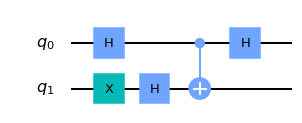

In [2]:
circ = QuantumCircuit(2)
circ.h(0)
circ.x(1)
circ.h(1)
circ.cx(0,1) #oracle here for f(x)=x
circ.h(0)
circ.draw('mpl')

Now we add the measurement equipment

In [3]:
meas = QuantumCircuit(2, 2)
meas.barrier(range(2))
meas.measure(range(2), range(2)) # map the quantum measurement to the classical bits

qc = circ + meas
qc.draw()

┌───┐          ┌───┐ ░ ┌─┐   
q_0: ┤ H ├───────■──┤ H ├─░─┤M├───
     ├───┤┌───┐┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├──────░──╫─┤M├
     └───┘└───┘└───┘      ░  ║ └╥┘
c: 2/════════════════════════╩══╩═
                             0  1

#### Now we first let the system run on the QASM simulator.

Counts for QASM: {'01': 516, '11': 508}


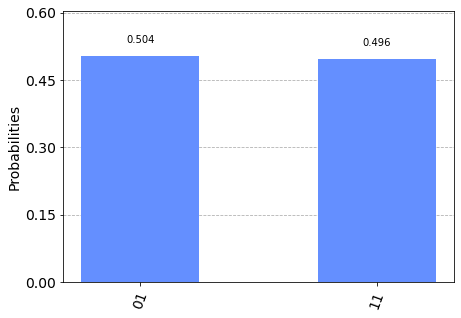

In [4]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator. We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc)
print("Counts for QASM:", counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

#### Now we simulate the Deutsch algorithm on the IBM machine

In [26]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-10-20 15:22:42,116: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_athens


In [6]:
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(qc, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


Counts for IBM machine: {'00': 21, '01': 488, '10': 21, '11': 494}


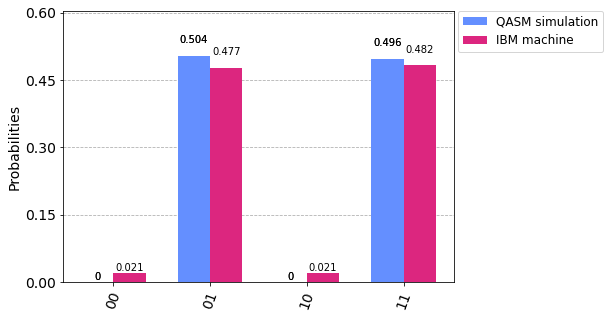

In [7]:
from qiskit.visualization import plot_histogram
results = job.result()
answer = results.get_counts()
print("Counts for IBM machine:", answer)

plot_histogram((counts, answer), legend=['QASM simulation','IBM machine']) # ibm machine

# Grover algorithm

For the two qubit version of the Grover algorithm only 3 qubits and no additional work qubits are required. We can simply compare the two input qubits with a CCX gate and let it act on your target qubit. If both qubits are in state 1, we get a 1 in our target qubit either. The applied gates are mirrored to reset the qubits to the initial states after comparing the qubit states.

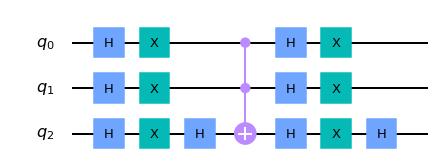

In [59]:
circ2 = QuantumCircuit(3)
for i in range(2):
    circ2.h(i)
    circ2.x(i)

circ2.h(2)
circ2.x(2)
circ2.h(2)

# Toffoli gate = oracle
circ2.ccx(0,1,2)

for i in range(2):
    circ2.h(i)
    circ2.x(i)

circ2.h(2)
circ2.x(2)
circ2.h(2)

circ2.draw('mpl')

In [61]:
meas2 = QuantumCircuit(3, 3)
meas2.barrier(range(3))
meas2.measure(range(3), range(3)) # map the quantum measurement to the classical bits

qc2 = circ2 + meas2
qc2.draw()

┌───┐┌───┐          ┌───┐┌───┐      ░ ┌─┐      
q_0: ┤ H ├┤ X ├───────■──┤ H ├┤ X ├──────░─┤M├──────
     ├───┤├───┤       │  ├───┤├───┤      ░ └╥┘┌─┐   
q_1: ┤ H ├┤ X ├───────■──┤ H ├┤ X ├──────░──╫─┤M├───
     ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ░  ║ └╥┘┌─┐
q_2: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─░──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════════════════════════╩══╩══╩═
                                            0  1  2

Counts for QASM: {'000': 46, '001': 65, '010': 62, '011': 580, '100': 78, '101': 63, '110': 62, '111': 68}


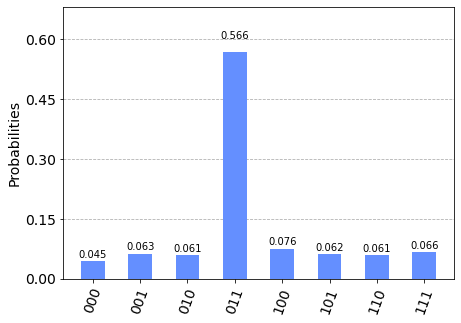

In [62]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator. We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = execute(qc2, backend_sim, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc2)
print("Counts for QASM:", counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [63]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-10-20 16:44:22,394: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_ourense


In [64]:
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(qc2, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

Job Status: job has successfully run


Counts for IBM machine: {'000': 79, '001': 110, '010': 114, '011': 451, '100': 78, '101': 35, '110': 37, '111': 120}


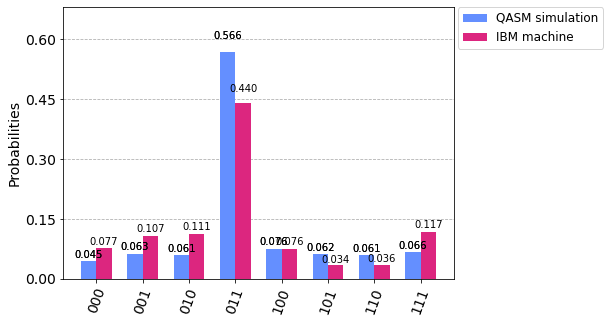

In [65]:
from qiskit.visualization import plot_histogram
results = job.result()
answer = results.get_counts()
print("Counts for IBM machine:", answer)

plot_histogram((counts, answer), legend=['QASM simulation','IBM machine']) # ibm machine

## Grover algorithm for arbitrary numbers

For the Groover algorithm for n control qubits n-1 additional work qubits are required that save intermediate results of the calculation.

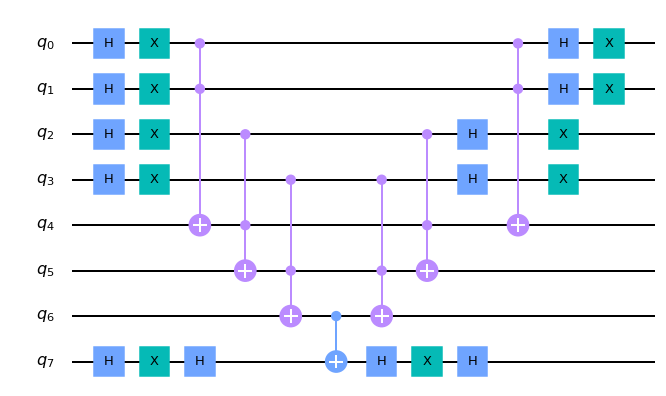

In [44]:
# The groover algorithm needs 3 work qubits to execute the algorithm, therefore 8 qubits needed here
circ2 = QuantumCircuit(8)
for i in range(4):
    circ2.h(i)
    circ2.x(i)

circ2.h(7)
circ2.x(7)
circ2.h(7)

# Toffoli gate = oracle
circ2.ccx(0,1,4)
circ2.ccx(4,2,5)
circ2.ccx(5,3,6)

circ2.cx(6,7)


circ2.ccx(5,3,6)
circ2.ccx(4,2,5)
circ2.ccx(0,1,4)


for i in range(4):
    circ2.h(i)
    circ2.x(i)

circ2.h(7)
circ2.x(7)
circ2.h(7)

circ2.draw('mpl')

Add measurement equipment to the circuit

In [49]:
meas2 = QuantumCircuit(8, 8)
meas2.barrier([0,1,2,3,7])
meas2.measure([0,1,2,3,7], [0,1,2,3,7]) # map the quantum measurement to the classical bits

qc2 = circ2 + meas2
qc2.draw()

┌───┐┌───┐                                        ┌───┐┌───┐ ░ ┌─┐      »
q_0: ┤ H ├┤ X ├──■──────────────────────────────────■──┤ H ├┤ X ├─░─┤M├──────»
     ├───┤├───┤  │                                  │  ├───┤├───┤ ░ └╥┘┌─┐   »
q_1: ┤ H ├┤ X ├──■──────────────────────────────────■──┤ H ├┤ X ├─░──╫─┤M├───»
     ├───┤├───┤  │                           ┌───┐  │  ├───┤└───┘ ░  ║ └╥┘┌─┐»
q_2: ┤ H ├┤ X ├──┼────■───────────────────■──┤ H ├──┼──┤ X ├──────░──╫──╫─┤M├»
     ├───┤├───┤  │    │                   │  ├───┤  │  ├───┤      ░  ║  ║ └╥┘»
q_3: ┤ H ├┤ X ├──┼────┼────■─────────■────┼──┤ H ├──┼──┤ X ├──────░──╫──╫──╫─»
     └───┘└───┘┌─┴─┐  │    │         │    │  └───┘┌─┴─┐└───┘      ░  ║  ║  ║ »
q_4: ──────────┤ X ├──■────┼─────────┼────■───────┤ X ├──────────────╫──╫──╫─»
               └───┘┌─┴─┐  │         │  ┌─┴─┐     └───┘              ║  ║  ║ »
q_5: ───────────────┤ X ├──■─────────■──┤ X ├────────────────────────╫──╫──╫─»
                    └───┘┌─┴─┐     ┌─┴─┐└───┘                        ║  ║  ║ »
q_6: ────────────────────┤ X ├──■──┤ X ├─────────────────────────────╫──╫──╫─»
     ┌───┐┌───┐┌───┐     └───┘┌─┴─┐├───┤┌───┐┌───┐                ░  ║  ║  ║ »
q_7: ┤ H ├┤ X ├┤ H ├──────────┤ X ├┤ H ├┤ X ├┤ H ├────────────────░──╫──╫──╫─»
     └───┘└───┘└───┘          └───┘└───┘└───┘└───┘                ░  ║  ║  ║ »
c: 8/════════════════════════════════════════════════════════════════╩══╩══╩═»
                                                                     0  1  2 »
«           
«q_0: ──────
«           
«q_1: ──────
«           
«q_2: ──────
«     ┌─┐   
«q_3: ┤M├───
«     └╥┘   
«q_4: ─╫────
«      ║    
«q_5: ─╫────
«      ║    
«q_6: ─╫────
«      ║ ┌─┐
«q_7: ─╫─┤M├
«      ║ └╥┘
«c: 8/═╩══╩═
«      3  7

### Run it on the Aer simulator

Counts for QASM: {'00000000': 2, '00000001': 7, '00000010': 9, '00000011': 4, '00000101': 6, '00000110': 3, '00000111': 5, '00001000': 3, '10000000': 5, '10000001': 4, '10000010': 3, '10000011': 1, '10000100': 4, '10000101': 3, '10000110': 5, '10000111': 4, '10001000': 2, '10001001': 6, '10001010': 3, '10001011': 4, '10001100': 5, '10001101': 3, '10001110': 3, '10001111': 4, '00001001': 7, '00001010': 3, '00001011': 1, '00001100': 6, '00001101': 2, '00001110': 2, '00001111': 905}


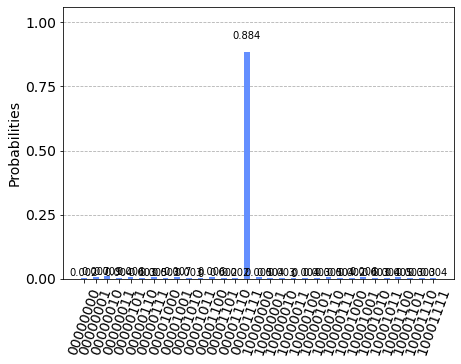

In [50]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator. We've set the number of repeats of the circuit to be 1024, which is the default.
job_sim = execute(qc2, backend_sim, shots=1024)
result_sim = job_sim.result()

counts = result_sim.get_counts(qc2)
print("Counts for QASM:", counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Run it on the ibm machine (Unsuccessfull)

TranspilerError: 'Number of qubits (8) in circuit140 is greater than maximum (5) in the coupling_map'

In [54]:
from qiskit.providers.ibmq import least_busy
provider = IBMQ.load_account()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (3) and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

ibmqfactory.load_account:WARNING:2020-10-20 16:33:37,328: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_ourense


In [55]:
from qiskit.tools.monitor import job_monitor

shots = 1024
job = execute(qc2, backend=backend, shots=shots, optimization_level=3)

job_monitor(job, interval = 2)

TranspilerError: 'Number of qubits (8) in circuit140 is greater than maximum (5) in the coupling_map'